In [ ]:
# Clean reinstall core stack (works well on Colab/Py3.12)
%pip uninstall -y pandas numpy pyarrow
%pip cache purge
%pip install --no-cache-dir --upgrade pandas==2.2.3 numpy==2.1.3 pyarrow==17.0.0

# Install arch (after pandas is OK)
%pip install --no-cache-dir arch


Found existing installation: pandas 2.2.3
Uninstalling pandas-2.2.3:
  Successfully uninstalled pandas-2.2.3
Found existing installation: numpy 2.1.3
Uninstalling numpy-2.1.3:
  Successfully uninstalled numpy-2.1.3
Found existing installation: pyarrow 17.0.0
Uninstalling pyarrow-17.0.0:
  Successfully uninstalled pyarrow-17.0.0
Files removed: 0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 252.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 162.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 220.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 94.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is

ERROR: Operation cancelled by user
^C


In [1]:
import pandas as pd, numpy as np, pyarrow as pa
from arch import arch_model
print("pandas:", pd.__version__, "| numpy:", np.__version__, "| pyarrow:", pa.__version__)
print("arch imported OK")


pandas: 2.2.3 | numpy: 2.1.3 | pyarrow: 17.0.0
arch imported OK


In [2]:
import io
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from google.colab import files

print("Please upload your 'final_predictors_2003_onwards.csv' file.")
uploaded = files.upload()  # choose the CSV from your computer
filename = next(iter(uploaded))

df = pd.read_csv(io.BytesIO(uploaded[filename]), index_col='Date', parse_dates=True)
print("Loaded shape:", df.shape)
df.head()


Please upload your 'final_predictors_2003_onwards.csv' file.


Saving final_predictors_2003_onwards.csv to final_predictors_2003_onwards (2).csv
Loaded shape: (4707, 11)


,OIL_WTI,GOLD,USDINR,SP500,NIFTY,VIX,FED_FUNDS,US_10Y_YIELD,US_1Y_YIELD,US_3M_YIELD,US_CPI
Date,,,,,,,,,,,
2007-09-17,80.570000,715.799988,40.376999,1476.650024,4494.649902,26.480000,5.33,4.48,4.23,4.05,207.667
2007-09-18,81.510002,715.799988,40.216999,1519.780029,4546.200195,20.350000,4.92,4.50,4.08,3.91,207.667
2007-09-19,81.930000,722.000000,40.033001,1529.030029,4732.350098,20.030001,4.74,4.53,4.06,3.83,207.667
2007-09-20,83.320000,732.400024,39.615002,1518.750000,4747.549805,20.450001,4.77,4.69,4.10,3.69,207.667
2007-09-21,81.620003,731.400024,39.770000,1525.750000,4837.549805,19.000000,4.76,4.64,4.09,3.64,207.667



--- Feature Engineering Complete ---
New features for LSTM: ['NIFTY', 'VIX', 'FED_FUNDS', 'US_10Y_YIELD', 'US_1Y_YIELD', 'US_3M_YIELD', 'US_CPI', 'SP500_log_return', 'OIL_WTI_log_return', 'GOLD_log_return', 'RV_d', 'RV_w', 'RV_m']

--- Fitting and Forecasting with Benchmark Models ---
HAR-RV model complete.
GARCH(1,1) model complete.
GJR-GARCH(1,1) model complete.

--- Preparing Data for Upgraded LSTM Model ---


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 60, 13)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 60, 64)         │        19,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 32)         │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention (Attention)           │ (None, 32)             │            92 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,157 (129.52 KB)

 Trainable params: 33,157 (129.52 KB)

 Non-trainable params: 0 (0.00 B)


--- Training Upgraded LSTM with Attention Model ---
Epoch 1/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - loss: 0.0137 - val_loss: 0.0097
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - loss: 0.0087 - val_loss: 0.0143
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.0090 - val_loss: 0.0161
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 0.0076 - val_loss: 0.0290
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.0063 - val_loss: 0.0054
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - loss: 0.0042 - val_loss: 0.0109
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - loss: 0.0042 - val_loss: 0.0097
Epoch 8/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0033 - val_loss: 0.0080
Epoch 9/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 0.0038 - val_loss: 0.0125
Epoch 10/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 0.0029 - val_loss: 0.0069
Epoch 11/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - loss: 0.0028 - val_loss: 0.

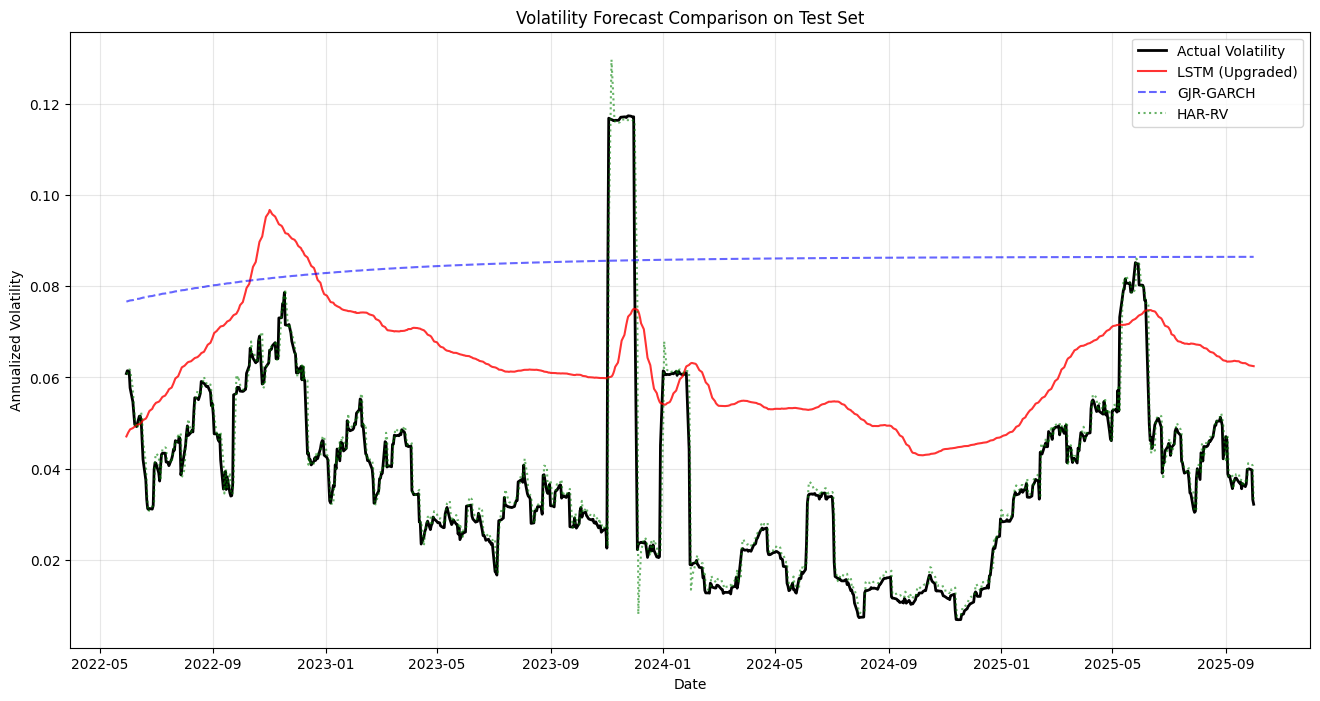

In [3]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import io

warnings.filterwarnings('ignore')

# Scikit-learn imports
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# TensorFlow imports
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Layer
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras.backend as K

# Arch imports
from arch import arch_model

# ===================================================================
# PART 2: FEATURE ENGINEERING & TARGET VARIABLE
# ===================================================================
df['USDINR_log_return'] = np.log(df['USDINR'] / df['USDINR'].shift(1))
df['SP500_log_return'] = np.log(df['SP500'] / df['SP500'].shift(1))
df['OIL_WTI_log_return'] = np.log(df['OIL_WTI'] / df['OIL_WTI'].shift(1))
df['GOLD_log_return'] = np.log(df['GOLD'] / df['GOLD'].shift(1))

df['REALIZED_VOLATILITY'] = df['USDINR_log_return'].rolling(window=21).std() * np.sqrt(252)

# HAR-style lagged features
df['RV_d'] = df['REALIZED_VOLATILITY'].shift(1)
df['RV_w'] = df['REALIZED_VOLATILITY'].shift(1).rolling(window=5).mean()
df['RV_m'] = df['REALIZED_VOLATILITY'].shift(1).rolling(window=22).mean()

df.dropna(inplace=True)

y = df['REALIZED_VOLATILITY']
X = df.drop(columns=['REALIZED_VOLATILITY', 'USDINR', 'SP500', 'OIL_WTI', 'GOLD', 'USDINR_log_return'])

print("\n--- Feature Engineering Complete ---")
print("New features for LSTM:", X.columns.tolist())

# ===================================================================
# PART 3: TRAIN-TEST SPLIT
# ===================================================================
split_index = int(len(df) * 0.8)
train_df, test_df = df.iloc[:split_index], df.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# ===================================================================
# PART 4: BENCHMARK MODELS
# ===================================================================
print("\n--- Fitting and Forecasting with Benchmark Models ---")
# HAR-RV
har_features = pd.DataFrame(index=y.index)
har_features['RV_d'] = y.shift(1)
har_features['RV_w'] = y.shift(1).rolling(window=5).mean()
har_features['RV_m'] = y.shift(1).rolling(window=22).mean()
har_data = pd.concat([y, har_features], axis=1).dropna()
y_har, X_har = har_data['REALIZED_VOLATILITY'], har_data.drop(columns=['REALIZED_VOLATILITY'])
X_har_train = X_har.loc[train_df.index.intersection(X_har.index)]
y_har_train = y_har.loc[X_har_train.index]
X_har_test = X_har.loc[test_df.index.intersection(X_har.index)]

har_model = LinearRegression()
har_model.fit(X_har_train, y_har_train)
har_predictions = har_model.predict(X_har_test)
har_results = pd.Series(har_predictions, index=X_har_test.index, name="HAR_Forecast")
print("HAR-RV model complete.")

# GARCH & GJR-GARCH
returns = train_df['USDINR_log_return'].dropna() * 100
garch_model = arch_model(returns, vol='Garch', p=1, q=1)
garch_res = garch_model.fit(disp='off')
garch_forecast = garch_res.forecast(horizon=len(test_df), reindex=False)
garch_predictions = np.sqrt(garch_forecast.variance.values.flatten()) / 100 * np.sqrt(252)
garch_results = pd.Series(garch_predictions, index=y_test.index, name="GARCH_Forecast")
print("GARCH(1,1) model complete.")

gjr_garch_model = arch_model(returns, vol='Garch', p=1, o=1, q=1)
gjr_res = gjr_garch_model.fit(disp='off')
gjr_forecast = gjr_res.forecast(horizon=len(test_df), reindex=False)
gjr_predictions = np.sqrt(gjr_forecast.variance.values.flatten()) / 100 * np.sqrt(252)
gjr_results = pd.Series(gjr_predictions, index=y_test.index, name="GJR_GARCH_Forecast")
print("GJR-GARCH(1,1) model complete.")

# ===================================================================
# PART 5: STACKED LSTM WITH ATTENTION
# ===================================================================
print("\n--- Preparing Data for Upgraded LSTM Model ---")
feature_scaler = MinMaxScaler()
X_train_scaled = feature_scaler.fit_transform(X.loc[y_train.index])
X_test_scaled = feature_scaler.transform(X.loc[y_test.index])

target_scaler = MinMaxScaler()
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1))

def create_sequences(X_data, y_data, window_size):
    X_seq, y_seq = [], []
    for i in range(len(X_data) - window_size):
        X_seq.append(X_data[i:(i + window_size)])
        y_seq.append(y_data[i + window_size])
    return np.array(X_seq), np.array(y_seq)

WINDOW_SIZE = 60
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, WINDOW_SIZE)
X_test_seq, _ = create_sequences(X_test_scaled, y_test.values, WINDOW_SIZE)

class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)
    def build(self, input_shape):
        self.W = self.add_weight(name='attention_weight',
                                 shape=(input_shape[-1], 1),
                                 initializer='random_normal', trainable=True)
        self.b = self.add_weight(name='attention_bias',
                                 shape=(input_shape[1], 1),
                                 initializer='zeros', trainable=True)
        super(Attention, self).build(input_shape)
    def call(self, x):
        e = K.tanh(K.dot(x, self.W) + self.b)
        e = K.squeeze(e, axis=-1)
        alpha = K.softmax(e)
        alpha = K.expand_dims(alpha, axis=-1)
        context = x * alpha
        return K.sum(context, axis=1)

input_layer = Input(shape=(X_train_seq.shape[1], X_train_seq.shape[2]))
lstm1 = LSTM(64, return_sequences=True)(input_layer)
dropout1 = Dropout(0.2)(lstm1)
lstm2 = LSTM(32, return_sequences=True)(dropout1)
attention = Attention()(lstm2)
dense1 = Dense(20, activation='relu')(attention)
output_layer = Dense(1)(dense1)
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

print("\n--- Training Upgraded LSTM with Attention Model ---")
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train_seq, y_train_seq, epochs=100, batch_size=32,
    validation_split=0.15, callbacks=[early_stopping], verbose=1
)

lstm_predictions_scaled = model.predict(X_test_seq)
lstm_predictions = target_scaler.inverse_transform(lstm_predictions_scaled)
lstm_results = pd.Series(lstm_predictions.flatten(),
                         index=y_test.index[WINDOW_SIZE:],
                         name="LSTM_Attention_Forecast")
print("Upgraded LSTM model complete.")

# ===================================================================
# PART 6: RESULTS AND EVALUATION
# ===================================================================
print("\n--- Comparing Model Performance ---")
y_test_aligned = y_test.iloc[WINDOW_SIZE:]
results_df = pd.DataFrame(y_test_aligned)
results_df = results_df.join(har_results, how='left')
results_df = results_df.join(garch_results, how='left')
results_df = results_df.join(gjr_results, how='left')
results_df = results_df.join(lstm_results, how='left')
results_df.dropna(inplace=True)

models_to_evaluate = ["HAR_Forecast", "GARCH_Forecast", "GJR_GARCH_Forecast", "LSTM_Attention_Forecast"]
metrics = {'Model': [], 'RMSE': [], 'MAE': []}
for model_name in models_to_evaluate:
    rmse = np.sqrt(mean_squared_error(results_df['REALIZED_VOLATILITY'], results_df[model_name]))
    mae = mean_absolute_error(results_df['REALIZED_VOLATILITY'], results_df[model_name])
    metrics['Model'].append(model_name)
    metrics['RMSE'].append(rmse)
    metrics['MAE'].append(mae)

metrics_df = pd.DataFrame(metrics)
print("\n--- Final Model Metrics ---")
print(metrics_df.round(6))

plt.figure(figsize=(16, 8))
plt.plot(results_df['REALIZED_VOLATILITY'], label='Actual Volatility', color='black', linewidth=2)
plt.plot(results_df['LSTM_Attention_Forecast'], label='LSTM (Upgraded)', color='red', alpha=0.8)
plt.plot(results_df['GJR_GARCH_Forecast'], label='GJR-GARCH', color='blue', alpha=0.6, linestyle='--')
plt.plot(results_df['HAR_Forecast'], label='HAR-RV', color='green', alpha=0.6, linestyle=':')
plt.title('Volatility Forecast Comparison on Test Set')
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
